# Simulación de Pulsos Ópticos Ultrarapidos

Este proyecto implementa una simulación numérica para modelar la propagación de un pulso óptico ultracorto a través de un medio no lineal, utilizando el método de *Split-Step Fourier* para resolver la ecuación de Schrödinger no lineal (NLS). La simulación incluye la evolución temporal del pulso y su correspondiente espectro de frecuencia.

## Requisitos

Para ejecutar el código, es necesario tener instalado lo siguiente:

- **Python 3.x**
- Bibliotecas:
  - `numpy`: Para el manejo de arreglos numéricos y funciones matemáticas.
  - `matplotlib`: Para la visualización de los resultados.

Instale las dependencias con el siguiente comando:

```bash
pip install numpy matplotlib
```

## Descripción de Variables

El código contiene varias variables clave que definen los parámetros del pulso, la simulación y el medio de propagación:

### Constantes Físicas

- `c`: Velocidad de la luz en el vacío (valor definido como \(3 \times 10^8 \, \text{m/s}\)).
- `lambda_0`: Longitud de onda central del pulso (en metros), que en este caso es de \(8 \, \mu\text{m}\).
- `T0`: Duración del pulso (en segundos), definido como \(1 \, \text{fs}\).
- `omega_0`: Frecuencia angular central, calculada como \(2 \pi c / \lambda_0\).

### Parámetros de Simulación

- `z_max`: Longitud máxima de propagación del pulso en el medio (en metros).
- `Nz`: Número de pasos en la dirección de propagación (eje \(z\)).
- `z`: Arreglo que representa el eje de propagación dividido en \(Nz\) puntos, desde \(0\) hasta \(z_{max}\).
  
### Eje Temporal y Frecuencia

- `Nt`: Número de puntos en el eje temporal.
- `t_max`: Tiempo máximo para definir el ancho de la ventana temporal. Se toma como \(5 \times T0\), para capturar adecuadamente la forma del pulso.
- `t`: Eje de tiempo, con \(Nt\) puntos distribuidos entre \(-t_{max}\) y \(t_{max}\).
- `dt`: Resolución temporal (diferencia entre dos puntos consecutivos en el eje temporal).
- `omega`: Frecuencia angular correspondiente a cada punto en el dominio temporal, calculada con la función de transformada rápida de Fourier (FFT).

### Parámetros del Medio

- `beta2`: Coeficiente de dispersión de grupo (en \(s^2/m\)), que afecta cómo las diferentes frecuencias del pulso se dispersan a lo largo de la propagación.
- `gamma`: Coeficiente de no linealidad (en \(W^{-1} \, m^{-1}\)), que describe la intensidad de la interacción no lineal en el medio.

### Pulso Inicial

- `A0`: Perfil temporal del pulso inicial, modelado como una función gaussiana con una fase compleja que incorpora la frecuencia angular central \(omega_0\).

## Método Numérico

El código implementa el método de *Split-Step Fourier* para simular la evolución del pulso a lo largo del eje de propagación. El método se basa en la ecuación de Schrödinger no lineal (NLS), que toma en cuenta tanto los efectos dispersivos (a través de \(beta2\)) como los no lineales (a través de \(gamma\)).

### Función `NLS_propagate`

La función `NLS_propagate` es responsable de realizar la simulación. Toma los siguientes parámetros:

- `A0`: El perfil del pulso inicial.
- `z`: El eje de propagación.
- `beta2`: Coeficiente de dispersión de grupo.
- `gamma`: Coeficiente de no linealidad.
- `dt`: Resolución temporal.
- `dz`: Paso en el eje de propagación.

La función utiliza la transformada rápida de Fourier (FFT) para pasar entre los dominios temporal y de frecuencia, aplicando los operadores correspondientes de dispersión y no linealidad en cada paso de propagación.

## Visualización de Resultados

El código genera dos gráficos para analizar el comportamiento del pulso:

1. **Intensidad del pulso en el dominio temporal**: Muestra la intensidad del pulso antes y después de la propagación.
2. **Espectro de frecuencia**: Muestra el espectro del pulso en el dominio de frecuencia, después de la propagación.

Ambos gráficos proporcionan información sobre cómo el pulso se modifica a medida que se propaga en el medio no lineal.

## Cómo Ejecutar el Código

1. Clone este repositorio o descargue el archivo Jupyter Notebook.
2. Abra el notebook con Jupyter ejecutando el siguiente comando en su terminal:

   ```bash
   jupyter notebook SimulacionesOptUlt_IIT_Rodriguez-Castrillon.ipynb
   ```

3. Ejecute las celdas secuencialmente para llevar a cabo la simulación y visualizar los resultados.

## Contribución

Se invita a la comunidad a contribuir con mejoras al código o la implementación de nuevas funcionalidades. Cualquier sugerencia será bienvenida.


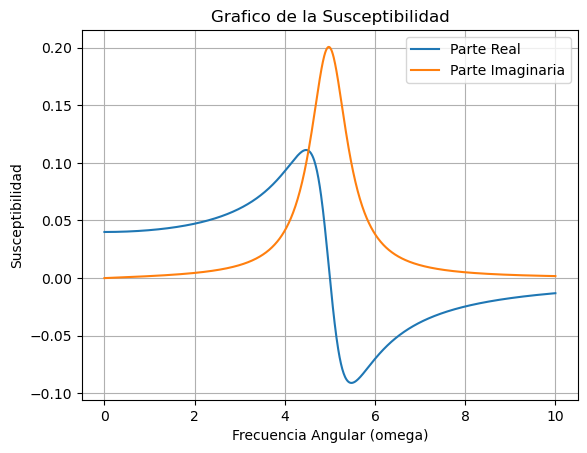

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función de susceptibilidad en función de la frecuencia angular (omega)
def susceptibilidad(omega, omega_p, omega_0, Q):
    suscept = (omega_p)**2 / (((omega_0)**2 - (omega)**2) + 2j * (omega_0 / Q) * omega)
    return suscept.real + 1j * np.abs(suscept.imag)

# Parámetros
omega_p = 1.0  # Frecuencia de plasma
omega_0 = 5.0  # Frecuencia de resonancia
Q = 10.0       # Factor de calidad

# Rango de frecuencias angulares
omega_values = np.linspace(0, 10, 1000)

# Calcula la susceptibilidad para cada frecuencia angular en el rango
susceptibility_values = susceptibilidad(omega_values, omega_p, omega_0, Q)

# Grafica la parte real e imaginaria de la susceptibilidad
plt.plot(omega_values, np.real(susceptibility_values), label='Parte Real')
plt.plot(omega_values, np.imag(susceptibility_values), label='Parte Imaginaria')
plt.xlabel('Frecuencia Angular (omega)')
plt.ylabel('Susceptibilidad')
plt.title('Grafico de la Susceptibilidad')
plt.legend()
plt.grid(True)
plt.show()


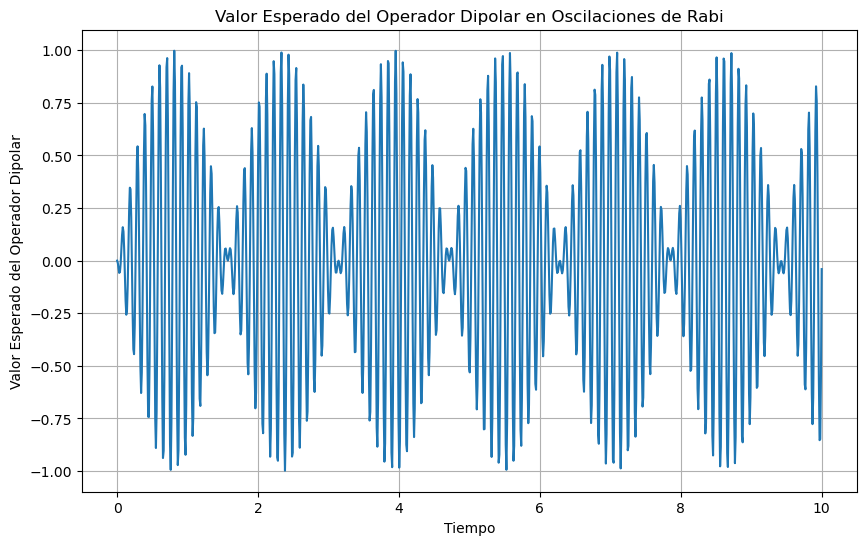

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Función para el valor esperado del operador dipolar
def dipolar_value(M, Omega_r, omega_eg, time):
    return -M * np.sin(2 * Omega_r * time) * np.sin(omega_eg * time)

# Rango de valores para la frecuencia de Rabi y el tiempo
Omega_r = 1.0  # Frecuencia de Rabi
omega_eg = 60.0  # Frecuencia de transición
M = 1.0  # Constante M
time_range = np.linspace(0, 10, 1000)  # Cambia los límites y la cantidad de puntos según sea necesario

# Calcular el valor esperado del operador dipolar para cada valor de tiempo
dipolar_values = dipolar_value(M, Omega_r, omega_eg, time_range)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(time_range, dipolar_values)
plt.xlabel('Tiempo')
plt.ylabel('Valor Esperado del Operador Dipolar')
plt.title('Valor Esperado del Operador Dipolar en Oscilaciones de Rabi')
plt.grid(True)
plt.show()


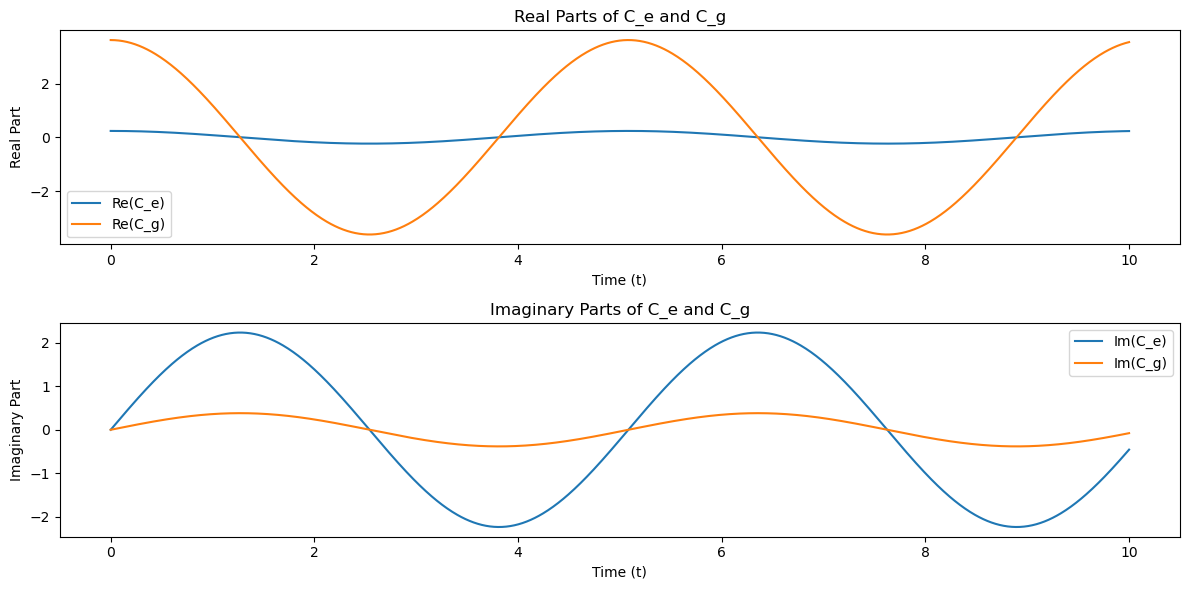

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
Delta = 1.0  # Diferencia de frecuencia (puedes ajustar)
Omega_r = 2.0  # Frecuencia de Rabi (puedes ajustar)
A = 1.0  # Constante A (puedes ajustar)
B = 0.5 # Constante B (puedes ajustar)

# Definir la función de tiempo
t = np.linspace(0, 10, 1000)

# Calcular los componentes
sqrt_term = np.sqrt(Delta**2 + Omega_r**2)
exp_term1 = np.exp(1j * t * (-Delta + sqrt_term))
exp_term2 = np.exp(1j * t * (Delta - sqrt_term))

C_e = A * exp_term1 * (-Delta + sqrt_term) - B * exp_term2 * Omega_r
C_g = A * exp_term1 * Omega_r + B * exp_term2 * (Delta + sqrt_term)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar las componentes reales de C_e y C_g
plt.subplot(2, 1, 1)
plt.plot(t, C_e.real, label='Re(C_e)')
plt.plot(t, C_g.real, label='Re(C_g)')
plt.xlabel('Time (t)')
plt.ylabel('Real Part')
plt.title('Real Parts of C_e and C_g')
plt.legend()

# Graficar las componentes imaginarias de C_e y C_g
plt.subplot(2, 1, 2)
plt.plot(t, C_e.imag, label='Im(C_e)')
plt.plot(t, C_g.imag, label='Im(C_g)')
plt.xlabel('Time (t)')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Parts of C_e and C_g')
plt.legend()

plt.tight_layout()
plt.show()


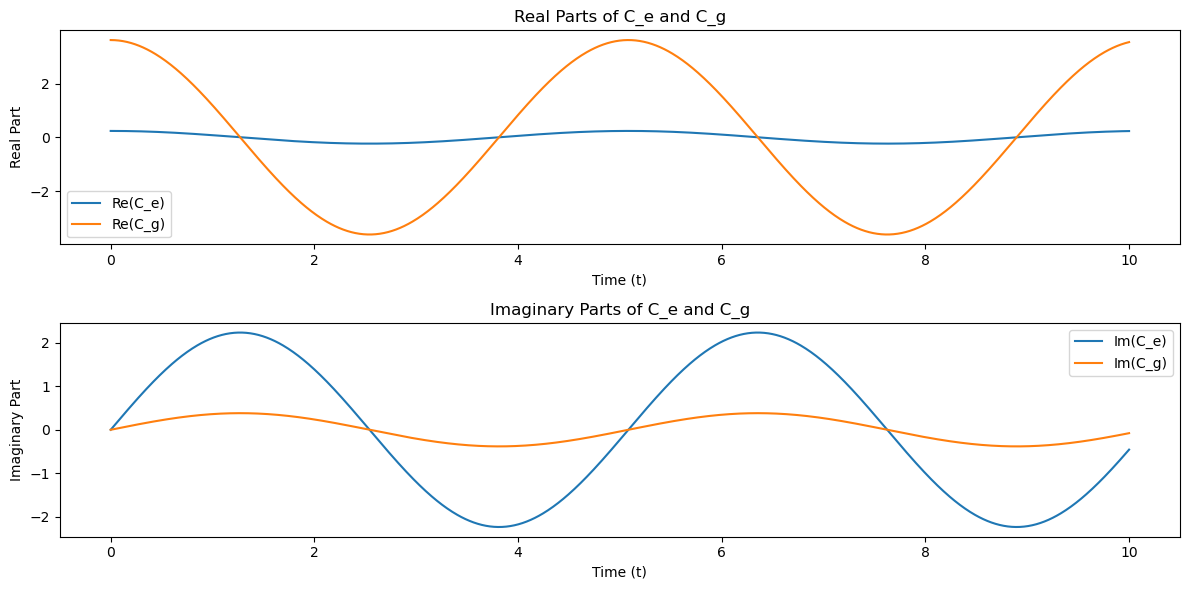

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
Delta = 1.0  # Diferencia de frecuencia (puedes ajustar)
Omega_r = 2.0  # Frecuencia de Rabi (puedes ajustar)
A = 1.0  # Constante A (puedes ajustar)
B = 0.5 # Constante B (puedes ajustar)

# Definir la función de tiempo
t = np.linspace(0, 10, 1000)

# Calcular los componentes
sqrt_term = np.sqrt(Delta**2 + Omega_r**2)
exp_term1 = np.exp(1j * t * (-Delta + sqrt_term))
exp_term2 = np.exp(1j * t * (Delta - sqrt_term))

C_e = A * exp_term1 * (-Delta + sqrt_term) - B * exp_term2 * Omega_r
C_g = A * exp_term1 * Omega_r + B * exp_term2 * (Delta + sqrt_term)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar las componentes reales de C_e y C_g
plt.subplot(2, 1, 1)
plt.plot(t, C_e.real, label='Re(C_e)')
plt.plot(t, C_g.real, label='Re(C_g)')
plt.xlabel('Time (t)')
plt.ylabel('Real Part')
plt.title('Real Parts of C_e and C_g')
plt.legend()

# Graficar las componentes imaginarias de C_e y C_g
plt.subplot(2, 1, 2)
plt.plot(t, C_e.imag, label='Im(C_e)')
plt.plot(t, C_g.imag, label='Im(C_g)')
plt.xlabel('Time (t)')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Parts of C_e and C_g')
plt.legend()

plt.tight_layout()
plt.show()


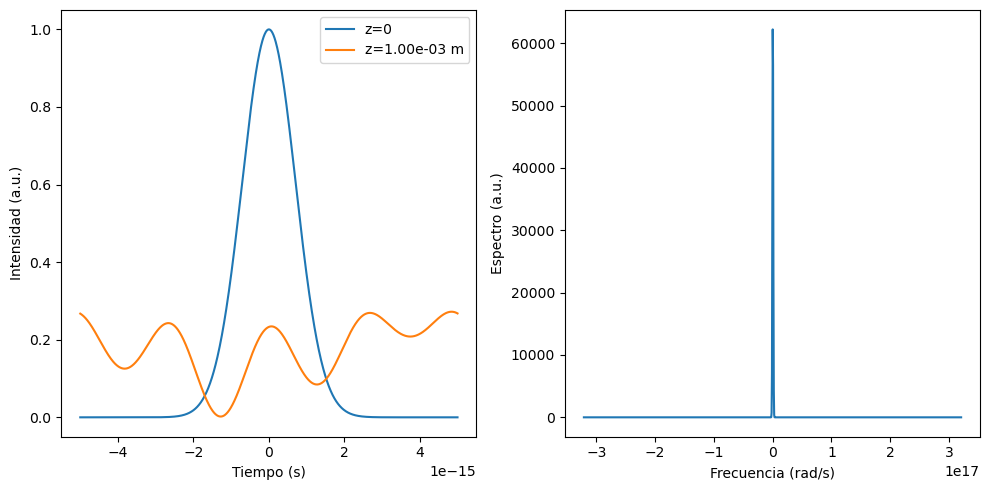

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
c = 3e8  # Velocidad de la luz en el vacío (m/s)
lambda_0 = 8e-6  # Longitud de onda central (m)
T0 = 1e-15  # Duración del pulso (s)
omega_0 = 2 * np.pi * c / lambda_0  # Frecuencia angular central (rad/s)

# Parámetros de simulación
z_max = 1e-3  # Distancia de propagación máxima (m)
Nz = 1000  # Número de pasos en z
z = np.linspace(0, z_max, Nz)  # Eje de propagación

# Tiempo y frecuencia
Nt = 1024  # Número de puntos en el tiempo
t_max = 5 * T0
t = np.linspace(-t_max, t_max, Nt)  # Eje de tiempo
dt = t[1] - t[0]
dw = 2 * np.pi / (Nt * dt)  # Resolución en frecuencia
omega = np.fft.fftfreq(Nt, d=dt) * 2 * np.pi  # Eje de frecuencia

# Parámetros de la fibra (ejemplo)
beta2 = -20e-27  # Dispersión de grupo (s^2/m)
gamma = 1e-3  # Coeficiente de no linealidad (W^-1 m^-1)

# Pulso inicial (Gaussiano)
A0 = np.exp(-t**2 / (2 * T0**2)) * np.exp(1j * omega_0 * t)

# Método de Split-Step Fourier
def NLS_propagate(A0, z, beta2, gamma, dt, dz):
    A = A0.copy()
    for i in range(len(z)):
        A_w = np.fft.fft(A) * np.exp(-1j * beta2 * omega**2 * dz / 2)
        A = np.fft.ifft(A_w)
        A *= np.exp(1j * gamma * np.abs(A)**2 * dz)
    return A

dz = z[1] - z[0]  # Paso en z
A_z = NLS_propagate(A0, z, beta2, gamma, dt, dz)

# Visualización del resultado
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(t, np.abs(A0)**2, label='z=0')
plt.plot(t, np.abs(A_z)**2, label=f'z={z_max:.2e} m')
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()

plt.subplot(122)
A_w = np.fft.fftshift(np.fft.fft(A_z))
omega_shifted = np.fft.fftshift(omega)
plt.plot(omega_shifted, np.abs(A_w)**2)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Espectro (a.u.)')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

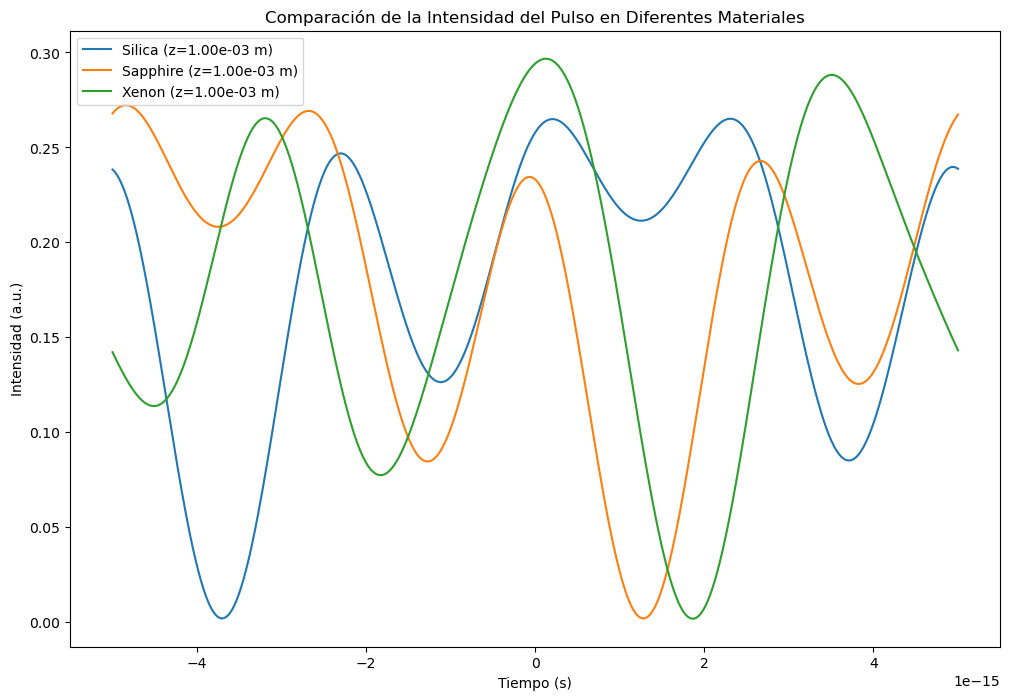

In [17]:
def simulate_pulse_for_material(beta2, gamma, z, A0, omega, dt, dz):
    return NLS_propagate(A0, z, beta2, gamma, dt, dz)

# Parámetros para cada material
materials = {
    "Silica": {"beta2": 36e-27, "gamma": 1.2e-3},
    "Sapphire": {"beta2": 20e-27, "gamma": 0.9e-3},
    "Xenon": {"beta2": -10e-27, "gamma": 0.5e-3},
}

# Simulación para cada material
results = {}
for material, params in materials.items():
    beta2 = params["beta2"]
    gamma = params["gamma"]
    A_z = simulate_pulse_for_material(beta2, gamma, z, A0, omega, dt, dz)
    results[material] = A_z

    plt.figure(figsize=(12, 8))
for material, A_z in results.items():
    plt.plot(t, np.abs(A_z)**2, label=f'{material} (z={z_max:.2e} m)')

plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.title('Comparación de la Intensidad del Pulso en Diferentes Materiales')
plt.show()

